In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

In [4]:
#configure to work with pandas
set_config(transform_output="pandas")

In [5]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


In [6]:
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size= 0.75, random_state=42
)

In [7]:
#step 1. define our predictor and response

X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [8]:
#step 2. initialize our model

lm = LinearRegression()

In [9]:
#step 3. fit to training data
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

,slope,intercept
0,132.075278,18547.098325


In [12]:
#step 4. making predictions on the test set
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

In [13]:
#calculate RMSPE

rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**0.5
rmspe

102248.73917282763

In [14]:
#calculate r2

r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)
r2

0.34513484921773563

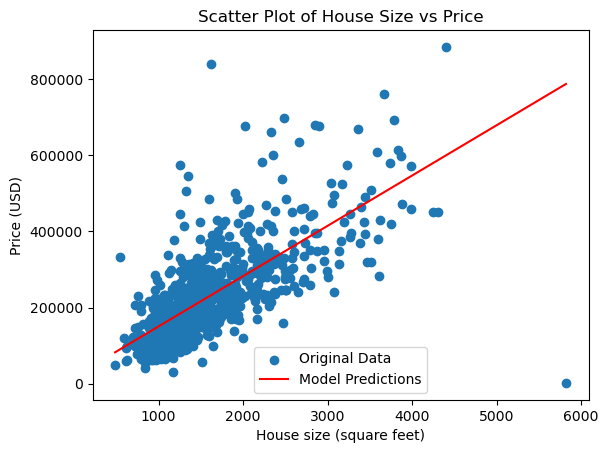

In [15]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [16]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,
    X=sacramento[["sq__ft"]],
    y=sacramento["price"],
    scoring= "neg_root_mean_squared_error"
)

In [17]:
cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.003772,0.000992,-115422.285707
1,0.002177,0.001561,-99220.026608
2,0.002074,0.000679,-77991.048578
3,0.001170,0.000573,-66840.128297
4,0.000899,0.000543,-64944.273857


In [18]:
cv_5_df["test_score"] = cv_5_df["test_score"].abs()
cv_5_df

,fit_time,score_time,test_score
0,0.003772,0.000992,115422.285707
1,0.002177,0.001561,99220.026608
2,0.002074,0.000679,77991.048578
3,0.001170,0.000573,66840.128297
4,0.000899,0.000543,64944.273857


In [19]:
cv_5_metrics = cv_5_df.agg(["mean","sem"])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.002018,0.00087,84883.552609
sem,0.000504,0.00019,9769.327806


In [20]:
returned_dictionary2 = cross_validate(
    estimator=lm,
    cv=5,
    X=sacramento[["sq__ft"]],
    y=sacramento["price"],
    scoring="r2"
)

In [21]:
cv_5_df2 = pd.DataFrame(returned_dictionary2)
cv_5_df2

,fit_time,score_time,test_score
0,0.003107,0.000851,0.177778
1,0.002783,0.001082,0.448617
2,0.002225,0.000698,0.513183
3,0.001154,0.000556,0.619692
4,0.000841,0.000554,0.646900


In [22]:
cv_5_metrics2 = cv_5_df2.agg(["mean","sem"])
cv_5_metrics2

,fit_time,score_time,test_score
mean,0.002022,0.000748,0.481234
sem,0.000444,0.000100,0.083901


In [23]:
#multivariable linear regression
mlm = LinearRegression()

In [24]:
mlm.fit(
    sacramento_train[["sq__ft","beds"]],
    sacramento_train["price"]
)

LinearRegression()

In [25]:
mlm.coef_

array([   151.1817206 , -20996.77714783])

In [26]:
mlm.coef_[0]

151.18172060169593

In [27]:
mlm.coef_[1]

-20996.77714783297

In [28]:
mlm.intercept_

56341.6051100234

In [29]:
sacramento_test["predicted"] = mlm.predict(sacramento_test[["sq__ft","beds"]])

In [30]:
mlm_rmspe = mean_squared_error(
    y_true= sacramento_test["price"],
    y_pred= sacramento_test["predicted"]
)**0.5

mlm_rmspe

104438.56729994333

In [31]:
mlm_r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)
mlm_r2

0.3167844099607501

In [32]:
returned_dictionary_mlm = cross_validate(
    estimator= mlm,
    cv = 5,
    X=sacramento[["sq__ft","beds"]],
    y= sacramento["price"],
    scoring="neg_root_mean_squared_error"
)

In [33]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)
cv_5_df_mlm

,fit_time,score_time,test_score
0,0.005009,0.003352,-117081.565378
1,0.002665,0.001621,-98766.468504
2,0.001232,0.000996,-78092.511515
3,0.001084,0.000433,-66186.915479
4,0.000923,0.000497,-63934.685283


In [34]:
cv_5_df_mlm["test_score"] = cv_5_df_mlm["test_score"].abs()
cv_5_df_mlm

,fit_time,score_time,test_score
0,0.005009,0.003352,117081.565378
1,0.002665,0.001621,98766.468504
2,0.001232,0.000996,78092.511515
3,0.001084,0.000433,66186.915479
4,0.000923,0.000497,63934.685283


In [36]:
cv_5_metrics_mlm = cv_5_df_mlm.agg(["mean","sem"])
cv_5_metrics_mlm

,fit_time,score_time,test_score
mean,0.002183,0.001380,84812.429232
sem,0.000772,0.000537,10158.640678


In [37]:
returned_dictionary_mlm2 = cross_validate(
    estimator= mlm,
    cv = 5,
    X = sacramento[["sq__ft","beds"]],
    y = sacramento["price"],
    scoring = "r2"
)

In [38]:
cv_5_df_mlm2 = pd.DataFrame(returned_dictionary_mlm2)

In [39]:
cv_5_metrics_mlm2 = cv_5_df_mlm2.agg(["mean","sem"])
cv_5_metrics_mlm2

,fit_time,score_time,test_score
mean,0.002449,0.00080,0.480882
sem,0.000960,0.00014,0.089792


In [40]:
###EXTRA FROM OFFICE HOURS


from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
X = sacramento[["sq__ft","beds"]]
#calculate VIF 

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,sq__ft,12.982605
1,beds,12.982605


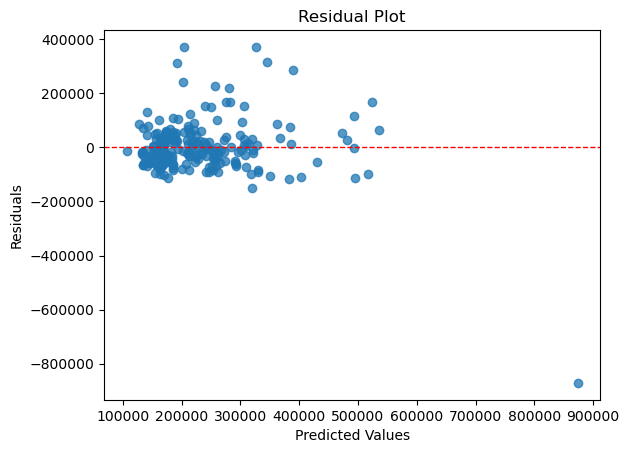

In [42]:
y_true = sacramento_test["price"]
y_pred = sacramento_test["predicted"]

# Calculate residuals
residuals = y_true - y_pred

# Residual plot
plt.scatter(y_pred, residuals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [8]:
sacramento["type"].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [13]:
sacramento_encoded = pd.get_dummies(sacramento, columns = ['type'], drop_first=False)
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,0,0,1
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,0,0,1
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,0,0,1
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,0,0,1
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730,0,0,1
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148,0,0,1
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160,0,0,1
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391,0,0,1


In [14]:
# now, lets choose our reference, drop multi-family
sacramento_encoded = sacramento_encoded.drop(columns=['type_Multi-Family'])
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,0,1
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,0,1
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,0,1
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,0,1
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730,0,1
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148,0,1
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160,0,1
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391,0,1


In [10]:
#step 1. initalize our model
mlm = LinearRegression()

In [11]:
mlm.fit(sacramento_encoded[["sq__ft","type_Multi-Family","type_Residential"]], sacramento_encoded["price"])

LinearRegression()

In [12]:
#get our beta coefficients from our fitted model
beta_coefficients = mlm.coef_
beta_coefficients

array([   124.77835602, -43095.20334028,  20782.00687535])